In [1]:
#install libraries which can be used in the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter


In [2]:
#intiallize the dataframe using pandas 
df=pd.read_excel('Online Retail.xlsx')

In [3]:
#understanding the columns and data types presnt in dataframe
df.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
293103,562579,22507,MEMO BOARD RETROSPOT DESIGN,4,2011-08-07 13:30:00,4.95,16950.0,United Kingdom
337315,566444,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6,2011-09-12 15:32:00,2.89,14020.0,United Kingdom
1228,536531,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 13:23:00,2.55,15485.0,United Kingdom
387784,570388,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-10-10 12:37:00,0.55,14911.0,EIRE
434064,574025,22928,YELLOW GIANT GARDEN THERMOMETER,1,2011-11-02 12:26:00,5.95,12748.0,United Kingdom
48606,540469,51014L,"FEATHER PEN,LIGHT PINK",12,2011-01-07 14:04:00,0.85,12484.0,Spain
415064,572513,23112,PARISIENNE CURIO CABINET,2,2011-10-24 14:36:00,7.50,16728.0,United Kingdom
109011,545577,84978,HANGING HEART JAR T-LIGHT HOLDER,12,2011-03-03 19:18:00,1.25,14702.0,United Kingdom
119864,546634,22096,PINK PAISLEY SQUARE TISSUE BOX,1,2011-03-15 12:10:00,1.25,14527.0,United Kingdom
512160,579510,85099B,JUMBO BAG RED RETROSPOT,10,2011-11-29 16:44:00,2.08,14554.0,United Kingdom


In [4]:
df.info()#to check for null values and data types present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe(include='all').T#to check the statistical summary of the data

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.query('Quantity<0').sample(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
126628,C547091,22800,ANTIQUE TALL SWIRLGLASS TRINKET POT,-4,2011-03-20 16:14:00,3.75,NaN,United Kingdom
72420,C542245,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,-2,2011-01-26 15:06:00,4.25,13098.0,United Kingdom
450093,C575160,23301,GARDENERS KNEELING PAD KEEP CALM,-2,2011-11-08 16:23:00,1.65,14911.0,EIRE
161879,C550494,21314,SMALL GLASS HEART TRINKET POT,-1,2011-04-18 14:54:00,1.85,15311.0,United Kingdom
149047,549268,84856S,NaN,-7,2011-04-07 12:47:00,0.00,NaN,United Kingdom
369983,569121,21244,NaN,-38,2011-09-30 13:03:00,0.00,NaN,United Kingdom
88207,C543787,85178,VICTORIAN SEWING KIT,-48,2011-02-11 17:05:00,0.85,15061.0,United Kingdom
255907,559398,21169,NaN,-70,2011-07-08 10:48:00,0.00,NaN,United Kingdom
140747,C548460,48184,DOORMAT ENGLISH ROSE,-2,2011-03-31 11:58:00,7.95,16801.0,United Kingdom
273692,C560855,21205,MULTICOLOUR 3D BALLS GARLAND,-2,2011-07-21 13:00:00,2.55,14410.0,United Kingdom


In [7]:
df.query('Quantity<0').shape

(10624, 8)

In [8]:
df.query('UnitPrice<0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


The negative unit price is beacuse of Adjust bad debt which needs further inquirey

In [9]:
null_value=df.isnull().sum()
percentage_null=(null_value[null_value>0]/len(df))*100
print(percentage_null)


Description     0.268311
CustomerID     24.926694
dtype: float64


24% of CustomerID contains Null values, as well as 0.26% of Description. Both of them need to be truncated, as it affects the authenticity of the data.


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df[df['CustomerID'].isnull() | df['Description'].isnull()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [12]:
df.dropna(inplace=True)


In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.duplicated().sum()

5225

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(401604, 8)

In [17]:
df['Transection_status']=np.where(df['Quantity']<0,'Cancelled','Purchase')

In [18]:
df[df['Transection_status'] == 'Cancelled']['Transection_status'].count()


8872

In [19]:
df['Month']=df['InvoiceDate'].dt.month
df['Weekday']=df['InvoiceDate'].dt.day_name()
df['Day']=df['InvoiceDate'].dt.day
df['Year']=df['InvoiceDate'].dt.year

In [20]:
df.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transection_status,Month,Weekday,Day,Year
323206,565250,22384,LUNCH BAG PINK POLKADOT,10,2011-09-02 10:42:00,1.65,13643.0,United Kingdom,Purchase,9,Friday,2,2011
102122,544969,20685,DOORMAT RED RETROSPOT,2,2011-02-25 11:32:00,7.95,15712.0,United Kingdom,Purchase,2,Friday,25,2011
310251,564172,21891,TRADITIONAL WOODEN SKIPPING ROPE,1,2011-08-23 14:19:00,1.45,16033.0,United Kingdom,Purchase,8,Tuesday,23,2011
513726,579559,22470,HEART OF WICKER LARGE,2,2011-11-30 11:30:00,2.95,16764.0,United Kingdom,Purchase,11,Wednesday,30,2011
130395,547488,22474,SPACEBOY TV DINNER TRAY,1,2011-03-23 11:30:00,4.95,13821.0,United Kingdom,Purchase,3,Wednesday,23,2011
87303,543651,22560,TRADITIONAL MODELLING CLAY,24,2011-02-11 10:06:00,1.25,16306.0,United Kingdom,Purchase,2,Friday,11,2011
350961,567656,21285,RETROSPOT CANDLE MEDIUM,1,2011-09-21 14:40:00,4.13,14096.0,United Kingdom,Purchase,9,Wednesday,21,2011
96498,544569,22644,CERAMIC CHERRY CAKE MONEY BANK,4,2011-02-21 12:58:00,1.45,16980.0,United Kingdom,Purchase,2,Monday,21,2011
311882,564327,22625,RED KITCHEN SCALES,4,2011-08-24 13:33:00,7.65,16029.0,United Kingdom,Purchase,8,Wednesday,24,2011
125884,547063,21914,BLUE HARMONICA IN BOX,12,2011-03-20 13:33:00,1.25,14769.0,United Kingdom,Purchase,3,Sunday,20,2011


In [21]:
df['StockCode'].nunique()

3684

In [22]:
df['Sales']=df['Quantity']*df['UnitPrice']

In [23]:
df.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transection_status,Month,Weekday,Day,Year,Sales
439275,574442,23472,NINE DRAWER OFFICE TIDY,2,2011-11-04 11:40:00,14.95,12704.0,Finland,Purchase,11,Friday,4,2011,29.90
180776,552353,23201,JUMBO BAG ALPHABET,10,2011-05-09 12:14:00,2.08,17612.0,United Kingdom,Purchase,5,Monday,9,2011,20.80
455237,575607,84992,72 SWEETHEART FAIRY CAKE CASES,1,2011-11-10 12:37:00,1.25,14096.0,United Kingdom,Purchase,11,Thursday,10,2011,1.25
321138,565129,84536B,FAIRY CAKES NOTEBOOK A7 SIZE,2,2011-09-01 12:41:00,0.42,15719.0,United Kingdom,Purchase,9,Thursday,1,2011,0.84
452488,575339,23307,SET OF 60 PANTRY DESIGN CAKE CASES,1,2011-11-09 14:29:00,0.55,15555.0,United Kingdom,Purchase,11,Wednesday,9,2011,0.55
117676,546396,16202A,PASTEL PINK PHOTO ALBUM,3,2011-03-11 14:35:00,0.50,13226.0,United Kingdom,Purchase,3,Friday,11,2011,1.50
285657,561916,M,Manual,1,2011-08-01 11:44:00,0.00,15581.0,United Kingdom,Purchase,8,Monday,1,2011,0.00
502715,578846,22966,GINGERBREAD MAN COOKIE CUTTER,5,2011-11-25 17:27:00,1.25,17757.0,United Kingdom,Purchase,11,Friday,25,2011,6.25
78715,542895,47566B,TEA TIME PARTY BUNTING,1,2011-02-01 13:47:00,4.65,14549.0,United Kingdom,Purchase,2,Tuesday,1,2011,4.65
83117,543283,47480,HANGING PHOTO CLIP ROPE LADDER,12,2011-02-07 09:15:00,1.65,15781.0,United Kingdom,Purchase,2,Monday,7,2011,19.80


<Axes: xlabel='Weekday', ylabel='Sales'>

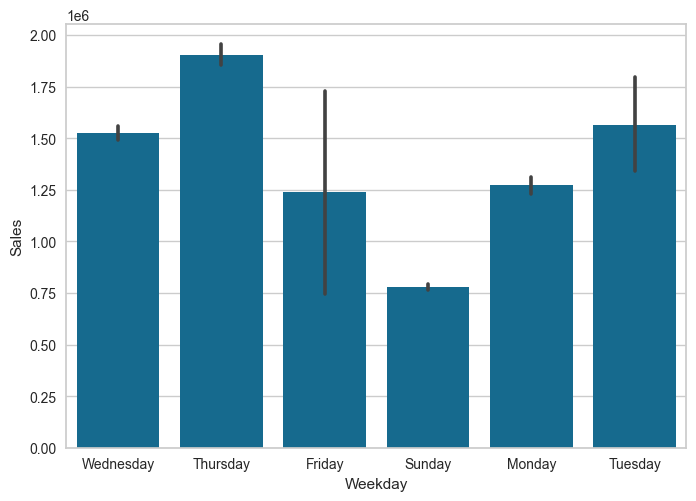

In [24]:
sns.barplot(x='Weekday',y='Sales',data=df,estimator=np.sum)

<Axes: xlabel='Month', ylabel='Sales'>

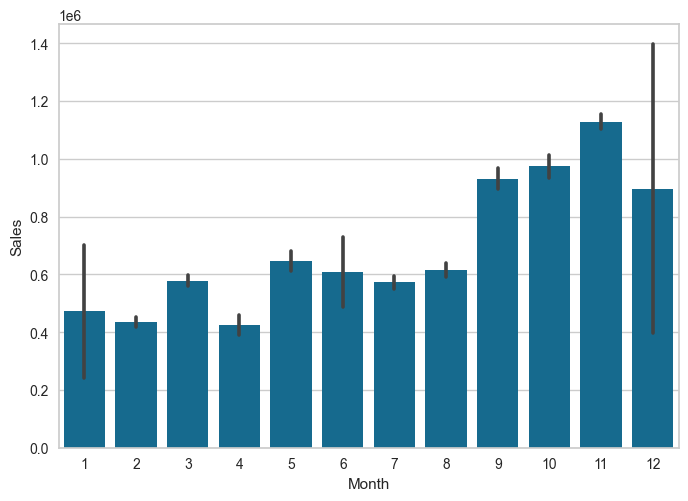

In [25]:
sns.barplot(x='Month',y='Sales',data=df,estimator=np.sum)

<Axes: xlabel='Day', ylabel='Sales'>

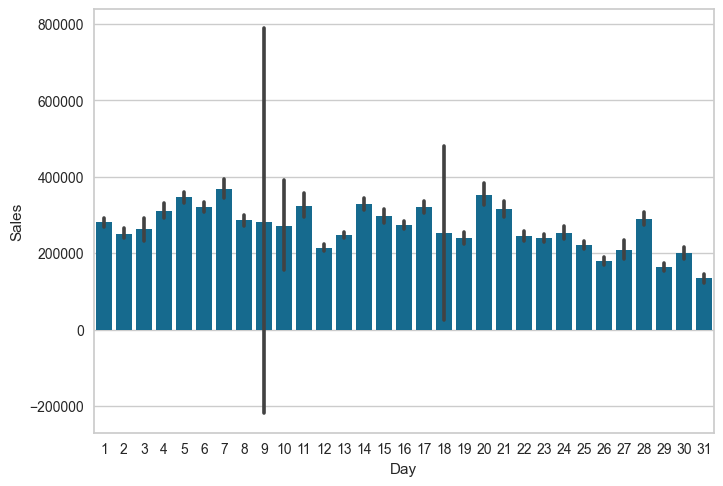

In [26]:
sns.barplot(x='Day',y='Sales',data=df,estimator=np.sum)

<Axes: ylabel='StockCode'>

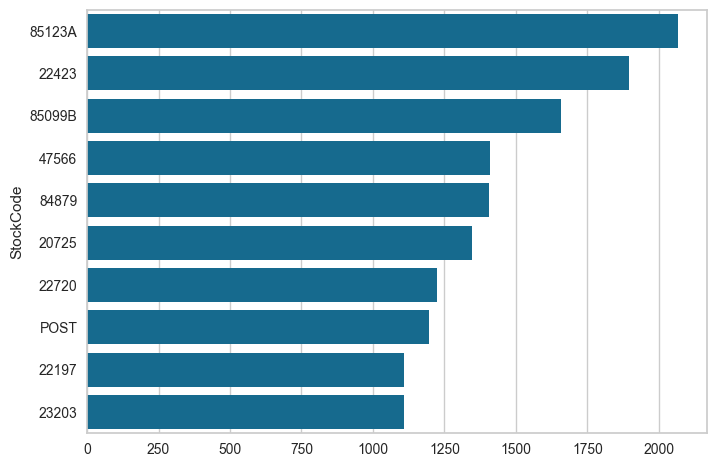

In [27]:
top_10_stockcodes = df['StockCode'].value_counts().head(10)
sns.barplot(y=top_10_stockcodes.index, x=top_10_stockcodes.values)


In [28]:
Unique_Stockcodes=df['StockCode'].unique()
invalid_stockcodes=[]
for i in Unique_Stockcodes:
    if str(i).isalpha():
        invalid_stockcodes.append(i)
        print(i)

POST
D
M
PADS
DOT
CRUK


In [29]:
df.drop(df[df['StockCode'].isin(invalid_stockcodes)].index,inplace=True)

In [30]:
description=df['Description'].unique()
lower_description=[]
special_characters_description=[]
for i in description:
    for disc in i:
        if disc.islower() and i not in lower_description:
            lower_description.append(i)
            print(i)
    special_characters = "@_!#$%^&*()<>?/\\|{}~:"
    contains_special_characters = any(char in i for char in special_characters)
    if contains_special_characters:
        special_characters_description.append(i)
        


BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
Bank Charges
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [31]:
invalid_description=['Bank Charges','Next Day Carriage','High Resolution Image']
invalid_description_percentage=(df[df['Description'].isin(invalid_description)].shape[0]/df.shape[0])*100
print(invalid_description_percentage)


0.023759800917878625


In [32]:
df.drop(df[df['Description'].isin(invalid_description)].index,inplace=True)

In [33]:
count=0
for i in special_characters_description:
    print(i)
    count+=1
print(count)

SET/2 RED RETROSPOT TEA TOWELS 
VINTAGE BILLBOARD LOVE/HATE MUG
WOOD S/3 CABINET ANT WHITE FINISH
SET/6 RED SPOTTY PAPER PLATES
CHARLIE & LOLA WASTEPAPER BIN FLORA
VINTAGE SNAKES & LADDERS
BLACK/BLUE POLKADOT UMBRELLA
SET/20 RED RETROSPOT PAPER NAPKINS 
SET/6 RED SPOTTY PAPER CUPS
S/6 SEW ON CROCHET FLOWERS
LADIES & GENTLEMEN METAL SIGN
SET/10 PINK POLKADOT PARTY CANDLES
SET/5 RED RETROSPOT LID GLASS BOWLS
PINK B'FLY C/COVER W BOBBLES
FOLDING UMBRELLA WHITE/RED POLKADOT
FOLDING UMBRELLA RED/WHITE POLKADOT
S/4 VALENTINE DECOUPAGE HEART BOX
S/6 WOODEN SKITTLES IN COTTON BAG
S/15 SILVER GLASS BAUBLES IN BAG
SET/10 RED POLKADOT PARTY CANDLES
DIAMANTE HAIR GRIP PACK/2 BLACK DIA
DIAMANTE HAIR GRIP PACK/2 RUBY
DIAMANTE HAIR GRIP PACK/2 MONTANA
SET/10 BLUE POLKADOT PARTY CANDLES
SET/9 CHRISTMAS T-LIGHTS SCENTED 
ORANGE SCENTED SET/9 T-LIGHTS
SET/10 IVORY POLKADOT PARTY CANDLES
PINK & WHITE BREAKFAST TRAY
PACK 3 FIRE ENGINE/CAR PATCHES
SET/12 TAPER CANDLES
SET/4 MODERN VINTAGE COTTON NAPKINS
GI

In [34]:
df['Description']=df['Description'].str.upper()

In [35]:
df.query('Quantity==0').shape[0]

0

In [36]:
unit_price=df.query('UnitPrice==0').shape[0]

In [37]:
percentage_unit_price=(unit_price/df.shape[0])*100
print(percentage_unit_price)

0.00825536598789213


In [38]:
df.drop(df[df['UnitPrice']==0].index,inplace=True)

In [39]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,399707.0,21784.0,576339.0,541.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,399707,3675,85123A,2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,399707,3887,WHITE HANGING HEART T-LIGHT HOLDER,2058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,399707.0,NaN,NaN,NaN,12.194242,-80995.0,2.0,5.0,12.0,80995.0,250.046442
InvoiceDate,399707,NaN,NaN,NaN,2011-07-10 12:11:28.817058048,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-29 15:51:00,2011-10-20 12:03:00,2011-12-09 12:50:00,NaN
UnitPrice,399707.0,NaN,NaN,NaN,2.92103,0.03,1.25,1.95,3.75,649.5,4.534792
CustomerID,399707.0,NaN,NaN,NaN,15288.513529,12346.0,13959.0,15152.0,16791.0,18287.0,1710.605501
Country,399707,37,United Kingdom,356038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transection_status,399707,2,Purchase,391201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,399707.0,NaN,NaN,NaN,7.595952,1.0,5.0,8.0,11.0,12.0,3.417537


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399707 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           399707 non-null  object        
 1   StockCode           399707 non-null  object        
 2   Description         399707 non-null  object        
 3   Quantity            399707 non-null  int64         
 4   InvoiceDate         399707 non-null  datetime64[ns]
 5   UnitPrice           399707 non-null  float64       
 6   CustomerID          399707 non-null  float64       
 7   Country             399707 non-null  object        
 8   Transection_status  399707 non-null  object        
 9   Month               399707 non-null  int32         
 10  Weekday             399707 non-null  object        
 11  Day                 399707 non-null  int32         
 12  Year                399707 non-null  int32         
 13  Sales               399707 non-nul

In [41]:
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transection_status,Month,Weekday,Day,Year,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Purchase,12,Wednesday,1,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchase,12,Wednesday,1,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Purchase,12,Wednesday,1,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchase,12,Wednesday,1,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchase,12,Wednesday,1,2010,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,Purchase,12,Wednesday,1,2010,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,Purchase,12,Wednesday,1,2010,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Purchase,12,Wednesday,1,2010,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Purchase,12,Wednesday,1,2010,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,Purchase,12,Wednesday,1,2010,54.08


The Stockcode represents the number of suppliers, as 84029G is for KNITTED UNION FLAG HOT WATER BOTTLE, whereas 84029E is for RED WOOLLY HOTTIE WHITE HEART, indicating that the letters after the numeric code represent the variety of products a supplier provides.

In [42]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDay'] = df['InvoiceDate'].dt.date
df['Invoicetime'] = df['InvoiceDate'].dt.time
customer_data= df.groupby('CustomerID')['InvoiceDay'].max().reset_index() # creating a dataframe named as customer_data which will contain customers need details 
most_recent_date=df['InvoiceDay'].max()
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days
customer_data.drop('InvoiceDay', axis=1, inplace=True) #remove the invoice day column from the Customer_data dataframe 
customer_data.head(20)

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
5,12352.0,36
6,12353.0,204
7,12354.0,232
8,12355.0,214
9,12356.0,22


In [43]:
total_transactions= df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)
customer_data=customer_data.merge(total_transactions, on='CustomerID', how='left')
customer_data=customer_data.merge(total_products_purchased, on='CustomerID', how='left')


In [44]:
customer_data.head(20)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196
5,12352.0,36,8,463
6,12353.0,204,1,20
7,12354.0,232,1,530
8,12355.0,214,1,240
9,12356.0,22,3,1573


In [45]:
df['Sales'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Sales'].sum().reset_index()
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Sales'] / average_transaction_value['Total_Transactions']
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')
customer_data.sample(5)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Sales,Average_Transaction_Value
3995,17781.0,159,2,34,188.02,94.010000
3704,17389.0,0,42,7442,31317.48,745.654286
862,13496.0,10,3,329,617.93,205.976667
226,12623.0,276,1,189,269.10,269.100000
1966,15027.0,30,6,563,1051.95,175.325000


In [46]:
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Sales,Average_Transaction_Value,StockCode
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


In [47]:

df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')
customer_data.head(20)


C:\Users\mishr\AppData\Local\Temp\ipykernel_7196\418109463.py:4: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Sales,Average_Transaction_Value,StockCode,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16
5,12352.0,36,8,463,1265.41,158.176250,57,3.132530,1,14
6,12353.0,204,1,20,89.00,89.000000,4,0.000000,3,17
7,12354.0,232,1,530,1079.40,1079.400000,58,0.000000,3,13
8,12355.0,214,1,240,459.40,459.400000,13,0.000000,0,13
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9


In [48]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.890747
Germany           0.022714
France            0.020400
EIRE              0.018681
Spain             0.006160
Name: proportion, dtype: float64

almost 90% of users are from United Kingdom and there are a total of 5 contry where the users are from

In [49]:

customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')


customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)


customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')


customer_data.sample(5)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Sales,Average_Transaction_Value,StockCode,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
2771,16164.0,17,4,432,802.53,200.632500,27,0.735294,1,9,1
3320,16919.0,156,11,1403,2592.25,235.659091,141,0.652308,1,13,1
1638,14593.0,21,3,330,617.15,205.716667,127,1.180000,4,12,1
2914,16361.0,9,4,418,891.21,222.802500,87,0.601942,3,13,1
1379,14236.0,80,2,310,490.86,245.430000,15,20.857143,1,9,1


In [50]:
customer_data['Is_UK'].value_counts()

Is_UK
1    3867
0     416
Name: count, dtype: int64

In [51]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

cancelled_transactions = df[df['Transection_status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique()
cancelled_transactions = df[df['Transection_status'] == 'Cancelled'].groupby('CustomerID')['InvoiceNo'].nunique()

cancellation_rate = (cancelled_transactions.sum() / total_transactions.sum()) * 100
print(cancellation_rate)
customer_data.sample(5)


15.525156077855307


C:\Users\mishr\AppData\Local\Temp\ipykernel_7196\1974117691.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Cancellation_Frequency'].fillna(0, inplace=True)


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Sales,Average_Transaction_Value,StockCode,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency
178,12571.0,39,2,523,519.61,259.805,31,2.484848,0,10,0,0.0
3526,17222.0,65,1,122,328.65,328.650,27,0.000000,2,13,1,0.0
3564,17277.0,227,2,430,1065.35,532.675,67,1.397059,4,12,1,0.0
2424,15676.0,9,5,2230,3309.09,661.818,190,1.280374,4,14,1,2.0
3472,17140.0,247,1,296,454.12,454.120,16,0.000000,2,13,1,0.0


In [52]:


monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Sales'].sum().reset_index()

seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Sales'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)


seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

def calculate_trend(spend_data):
    
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
     
    else:
        return 0


spending_trends = monthly_spending.groupby('CustomerID')['Sales'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Sales': 'Spending_Trend'}, inplace=True)



 
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')


customer_data.sample(5)

C:\Users\mishr\AppData\Local\Temp\ipykernel_7196\662815034.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Sales,Average_Transaction_Value,StockCode,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
1256,14066.0,266,1,45,152.55,152.550000,7,0.000000,4,12,1,0.0,152.550000,0.000000,0.000000
3270,16847.0,43,1,78,193.44,193.440000,12,0.000000,3,13,1,0.0,193.440000,0.000000,0.000000
3711,17491.0,1,11,2012,3541.92,321.992727,72,3.357798,3,11,1,1.0,442.740000,209.038485,41.801905
4243,18230.0,9,10,1298,2716.60,271.660000,32,4.045455,3,13,1,3.0,388.085714,226.803131,81.285714
2953,16412.0,53,1,63,135.99,135.990000,25,0.000000,0,12,1,0.0,135.990000,0.000000,0.000000


In [53]:
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)
customer_data = customer_data.convert_dtypes()
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Sales,Average_Transaction_Value,StockCode,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,359.31,203.875689,-100.884
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,1457.55,0.0,0.0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,294.4,0.0,0.0
5,12352.0,36,8,463,1265.41,158.17625,57,3.13253,1,14,0,1,316.3525,134.700629,9.351
6,12353.0,204,1,20,89.0,89.0,4,0.0,3,17,0,0,89.0,0.0,0.0
7,12354.0,232,1,530,1079.4,1079.4,58,0.0,3,13,0,0,1079.4,0.0,0.0
8,12355.0,214,1,240,459.4,459.4,13,0.0,0,13,0,0,459.4,0.0,0.0
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0,829.143333,991.462585,-944.635


In [54]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4283 entries, 0 to 4282
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4283 non-null   string 
 1   Days_Since_Last_Purchase        4283 non-null   Int64  
 2   Total_Transactions              4283 non-null   Int64  
 3   Total_Products_Purchased        4283 non-null   Int64  
 4   Sales                           4283 non-null   Float64
 5   Average_Transaction_Value       4283 non-null   Float64
 6   StockCode                       4283 non-null   Int64  
 7   Average_Days_Between_Purchases  4283 non-null   Float64
 8   Day_Of_Week                     4283 non-null   Int32  
 9   Hour                            4283 non-null   Int32  
 10  Is_UK                           4283 non-null   Int64  
 11  Cancellation_Frequency          4283 non-null   Int64  
 12  Monthly_Spending_Mean           42

In [55]:
model = IsolationForest(contamination=0.05, random_state=0)

customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Sales,Average_Transaction_Value,StockCode,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.0,0.0,0.0,1,0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,359.31,203.875689,-100.884,1,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,1457.55,0.0,0.0,1,0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,294.4,0.0,0.0,1,0


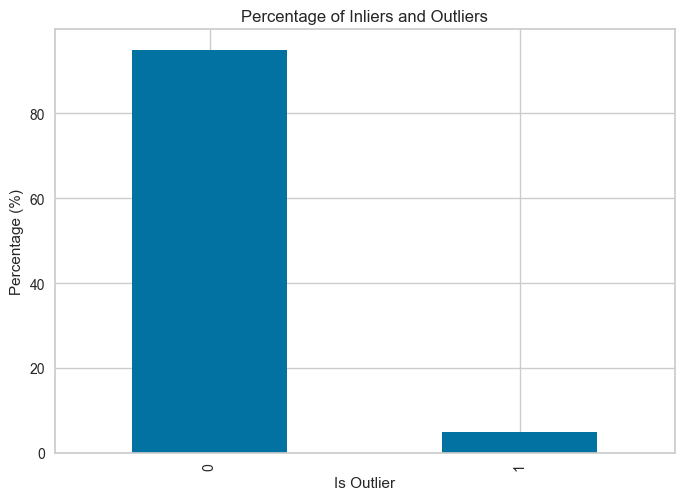

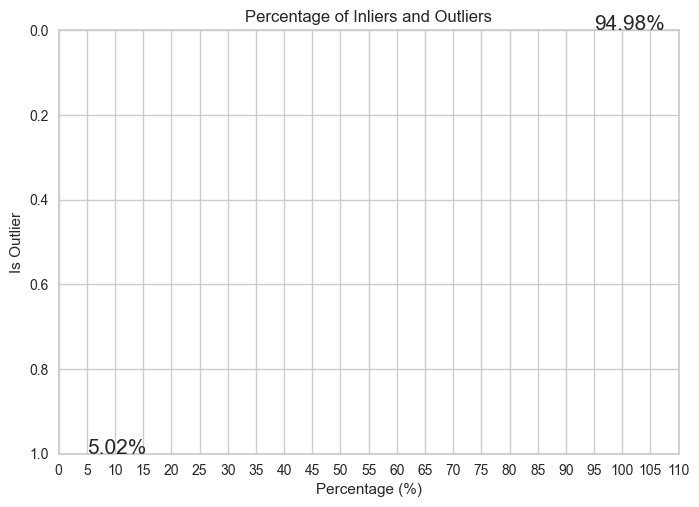

In [56]:
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100


outlier_percentage.plot(kind='bar')
plt.title('Percentage of Inliers and Outliers')
plt.xlabel('Is Outlier')
plt.ylabel('Percentage (%)')
plt.show()



for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [57]:

outliers_data = customer_data[customer_data['Is_Outlier'] == 1]


customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

customer_data_cleaned.reset_index(drop=True, inplace=True)
customer_data_cleaned.shape[0]

4068

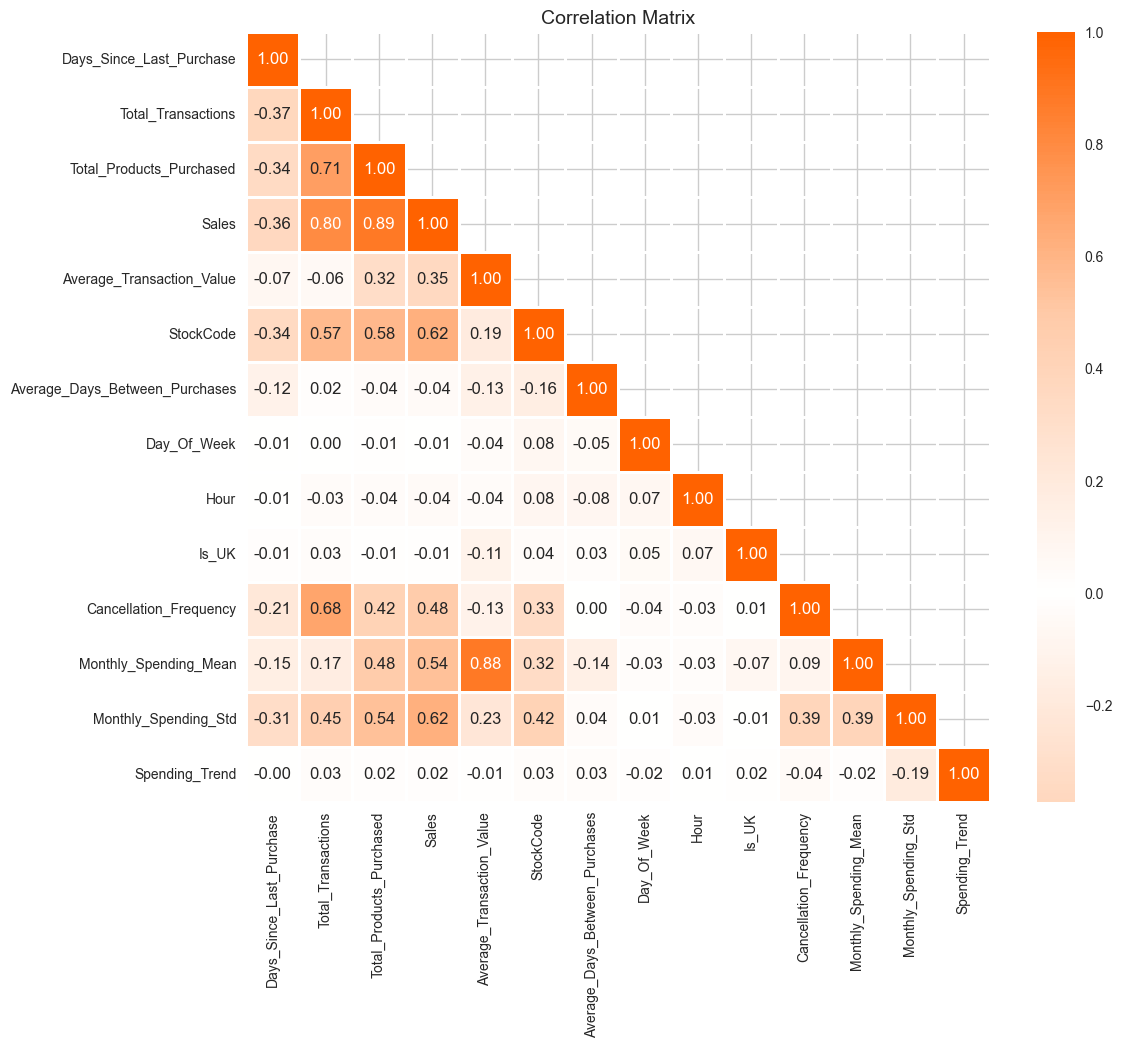

In [58]:
sns.set_style('whitegrid')

corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [59]:
scaler = StandardScaler()

columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

customer_data_scaled = customer_data_cleaned.copy()

customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Sales,Average_Transaction_Value,StockCode,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.346557,-0.476658,-0.771156,-0.836391,-1.320891,-0.899885,-0.427712,1,-1.089388,1,0.340471,-1.346424,-0.730044,0.093867
1,12347.0,-0.902049,0.653717,2.039214,2.410810,1.543223,0.775740,-0.141052,1,0.646804,0,-0.519800,1.007700,1.318378,0.120508
2,12348.0,-0.167844,-0.024508,1.895151,0.246441,0.350509,-0.571331,1.119561,3,2.817045,0,-0.519800,0.027363,0.494404,-0.505248
3,12349.0,-0.741128,-0.702733,-0.050841,0.261743,5.459185,0.266482,-0.427712,0,-1.523437,0,-0.519800,4.226377,-0.730044,0.093867
4,12350.0,2.195693,-0.702733,-0.547058,-0.614586,0.048567,-0.653469,-0.427712,2,1.514901,0,-0.519800,-0.220814,-0.730044,0.093867


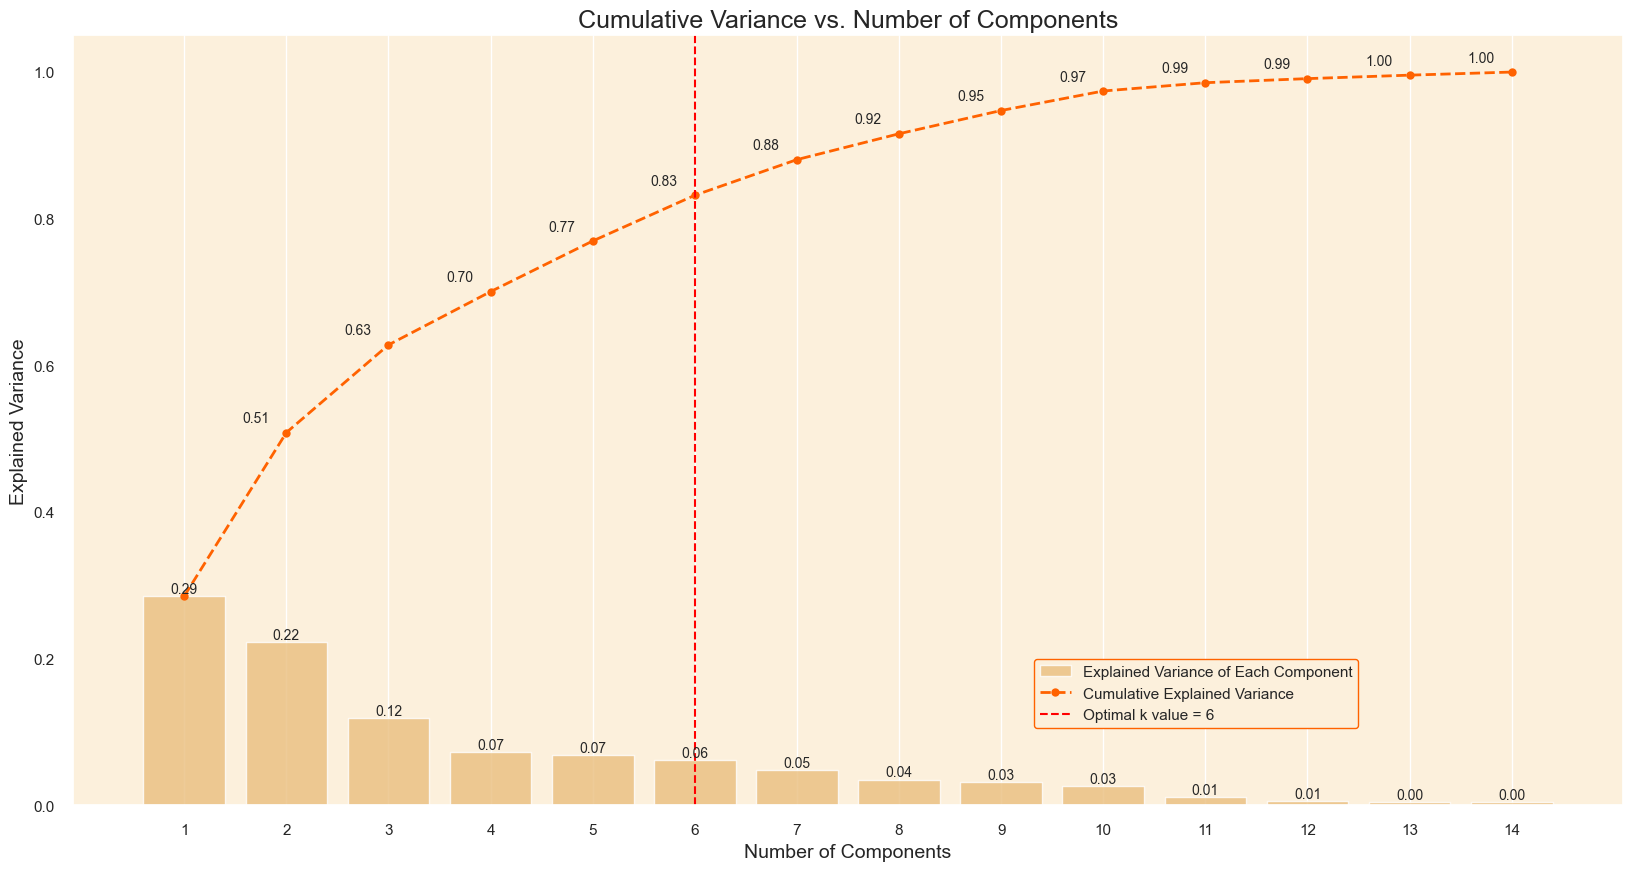

In [60]:

customer_data_scaled.set_index('CustomerID', inplace=True)

pca = PCA().fit(customer_data_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

optimal_k = 6

sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

plt.figure(figsize=(20, 10))

barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [61]:
pca = PCA(n_components=6)

customer_data_pca = pca.fit_transform(customer_data_scaled)

customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

customer_data_pca.index = customer_data_scaled.index

customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.482713,-1.582076,-1.083302,-0.301447,0.477739,-2.143690
12347.0,3.531101,-1.545813,1.304139,-0.217947,-0.299628,0.903268
12348.0,0.766877,0.523678,0.224607,-0.389695,0.362004,2.630391
12349.0,1.981590,-2.872677,6.088552,1.182103,-1.049568,-0.385198
12350.0,-1.946598,-0.485546,0.780904,-1.487967,0.534251,0.035450


In [62]:
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.226336,-0.005608,0.142703,-0.176663,0.163402,-0.463567
Total_Transactions,0.382112,0.005956,-0.332732,-0.073373,-0.032459,-0.112968
Total_Products_Purchased,0.419690,-0.007119,-0.003466,-0.018697,-0.074088,-0.054629
Sales,0.447357,-0.004223,-0.004794,-0.009436,-0.059302,-0.061848
Average_Transaction_Value,0.189561,-0.031432,0.634529,0.094829,-0.077740,0.052971
StockCode,0.344372,0.052420,-0.045486,-0.258707,-0.023057,0.050556
Average_Days_Between_Purchases,-0.030903,-0.036339,-0.210945,0.633081,-0.316059,0.415980
Day_Of_Week,0.000681,0.995088,0.023041,0.069274,-0.029975,-0.036091
Hour,-0.014860,0.058527,-0.001355,-0.571682,0.156430,0.721418
Is_UK,-0.001565,0.008200,-0.020670,-0.011630,-0.002290,0.017366


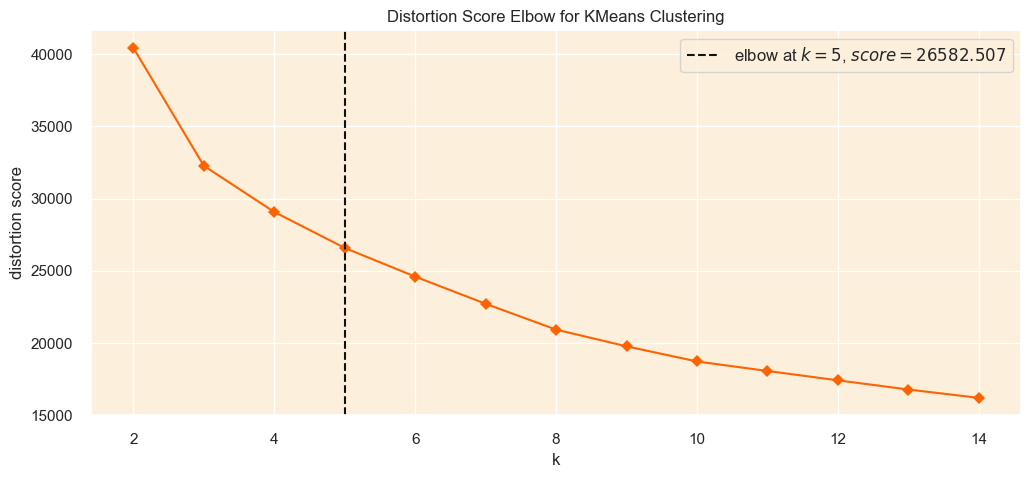

In [63]:

sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

sns.set_palette(['#ff6200'])

km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

fig, ax = plt.subplots(figsize=(12, 5))

visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

visualizer.fit(customer_data_pca)

visualizer.show();

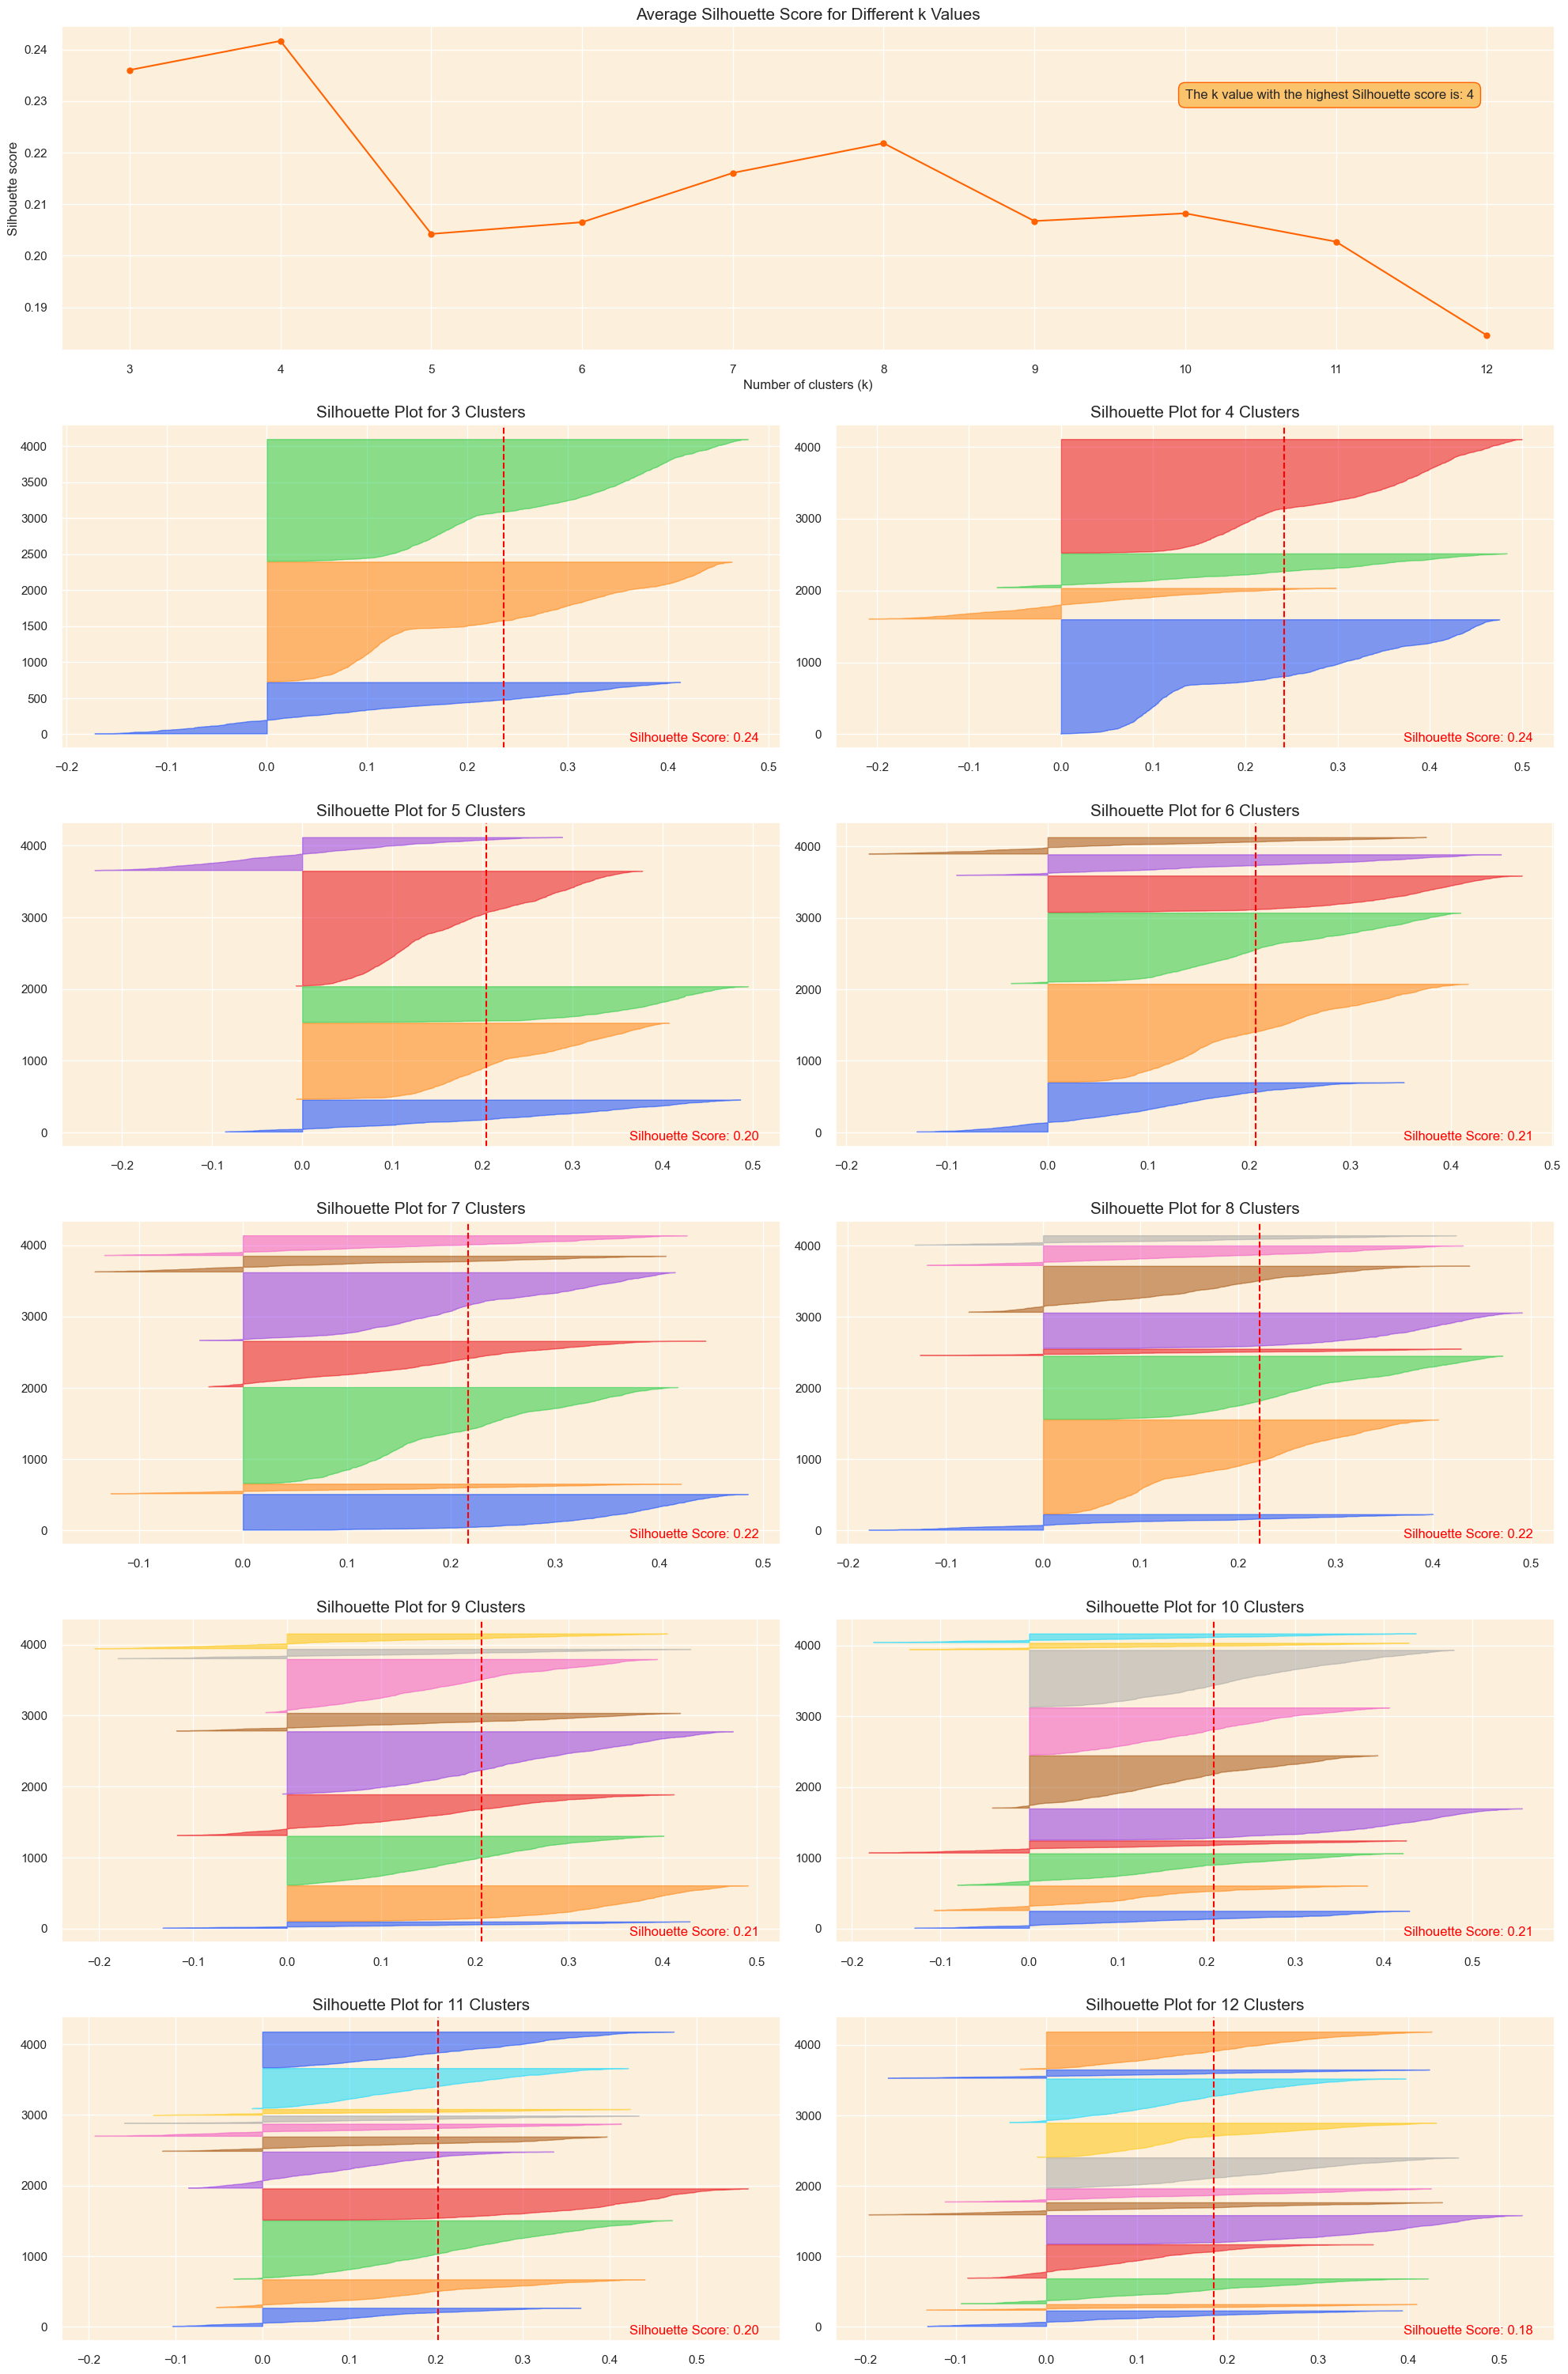

In [64]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):

    plt.figure(figsize=figsize)

    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    first_plot = plt.subplot(grid[0, :])

    sns.set_palette(['darkorange'])

    silhouette_scores = []

    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

In [65]:

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

cluster_frequencies = Counter(kmeans.labels_)

label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

customer_data_cleaned['cluster'] = new_labels

customer_data_pca['cluster'] = new_labels
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Sales,Average_Transaction_Value,StockCode,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.0,0.0,0.0,0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,615.714286,341.070789,4.486071,1
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,359.31,203.875689,-100.884,2
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,1457.55,0.0,0.0,0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,294.4,0.0,0.0,0


In [66]:
colors = ['#e8000b', '#1ac938', '#023eff']

cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

fig.show()

C:\Users\mishr\AppData\Local\Temp\ipykernel_7196\4082081823.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




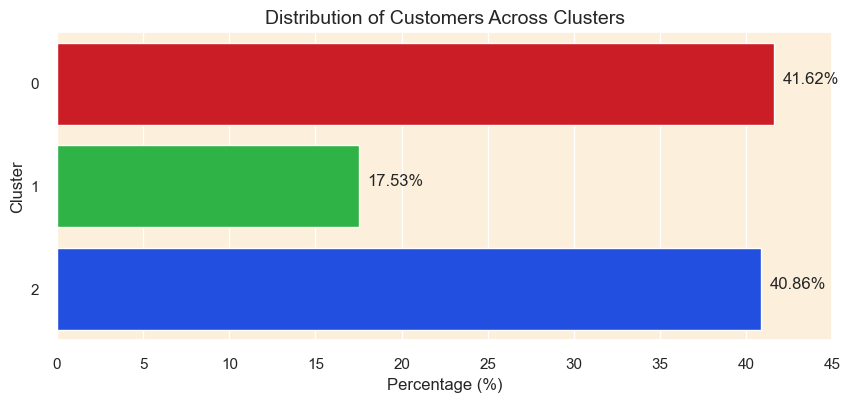

In [68]:

cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

plt.show()

In [69]:

num_observations = len(customer_data_pca)

X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        4068        |
|    Silhouette Score     | 0.2360190142362161 |
| Calinski Harabasz Score | 1274.9236453034957 |
|  Davies Bouldin Score   | 1.3796384588133843 |
+-------------------------+--------------------+


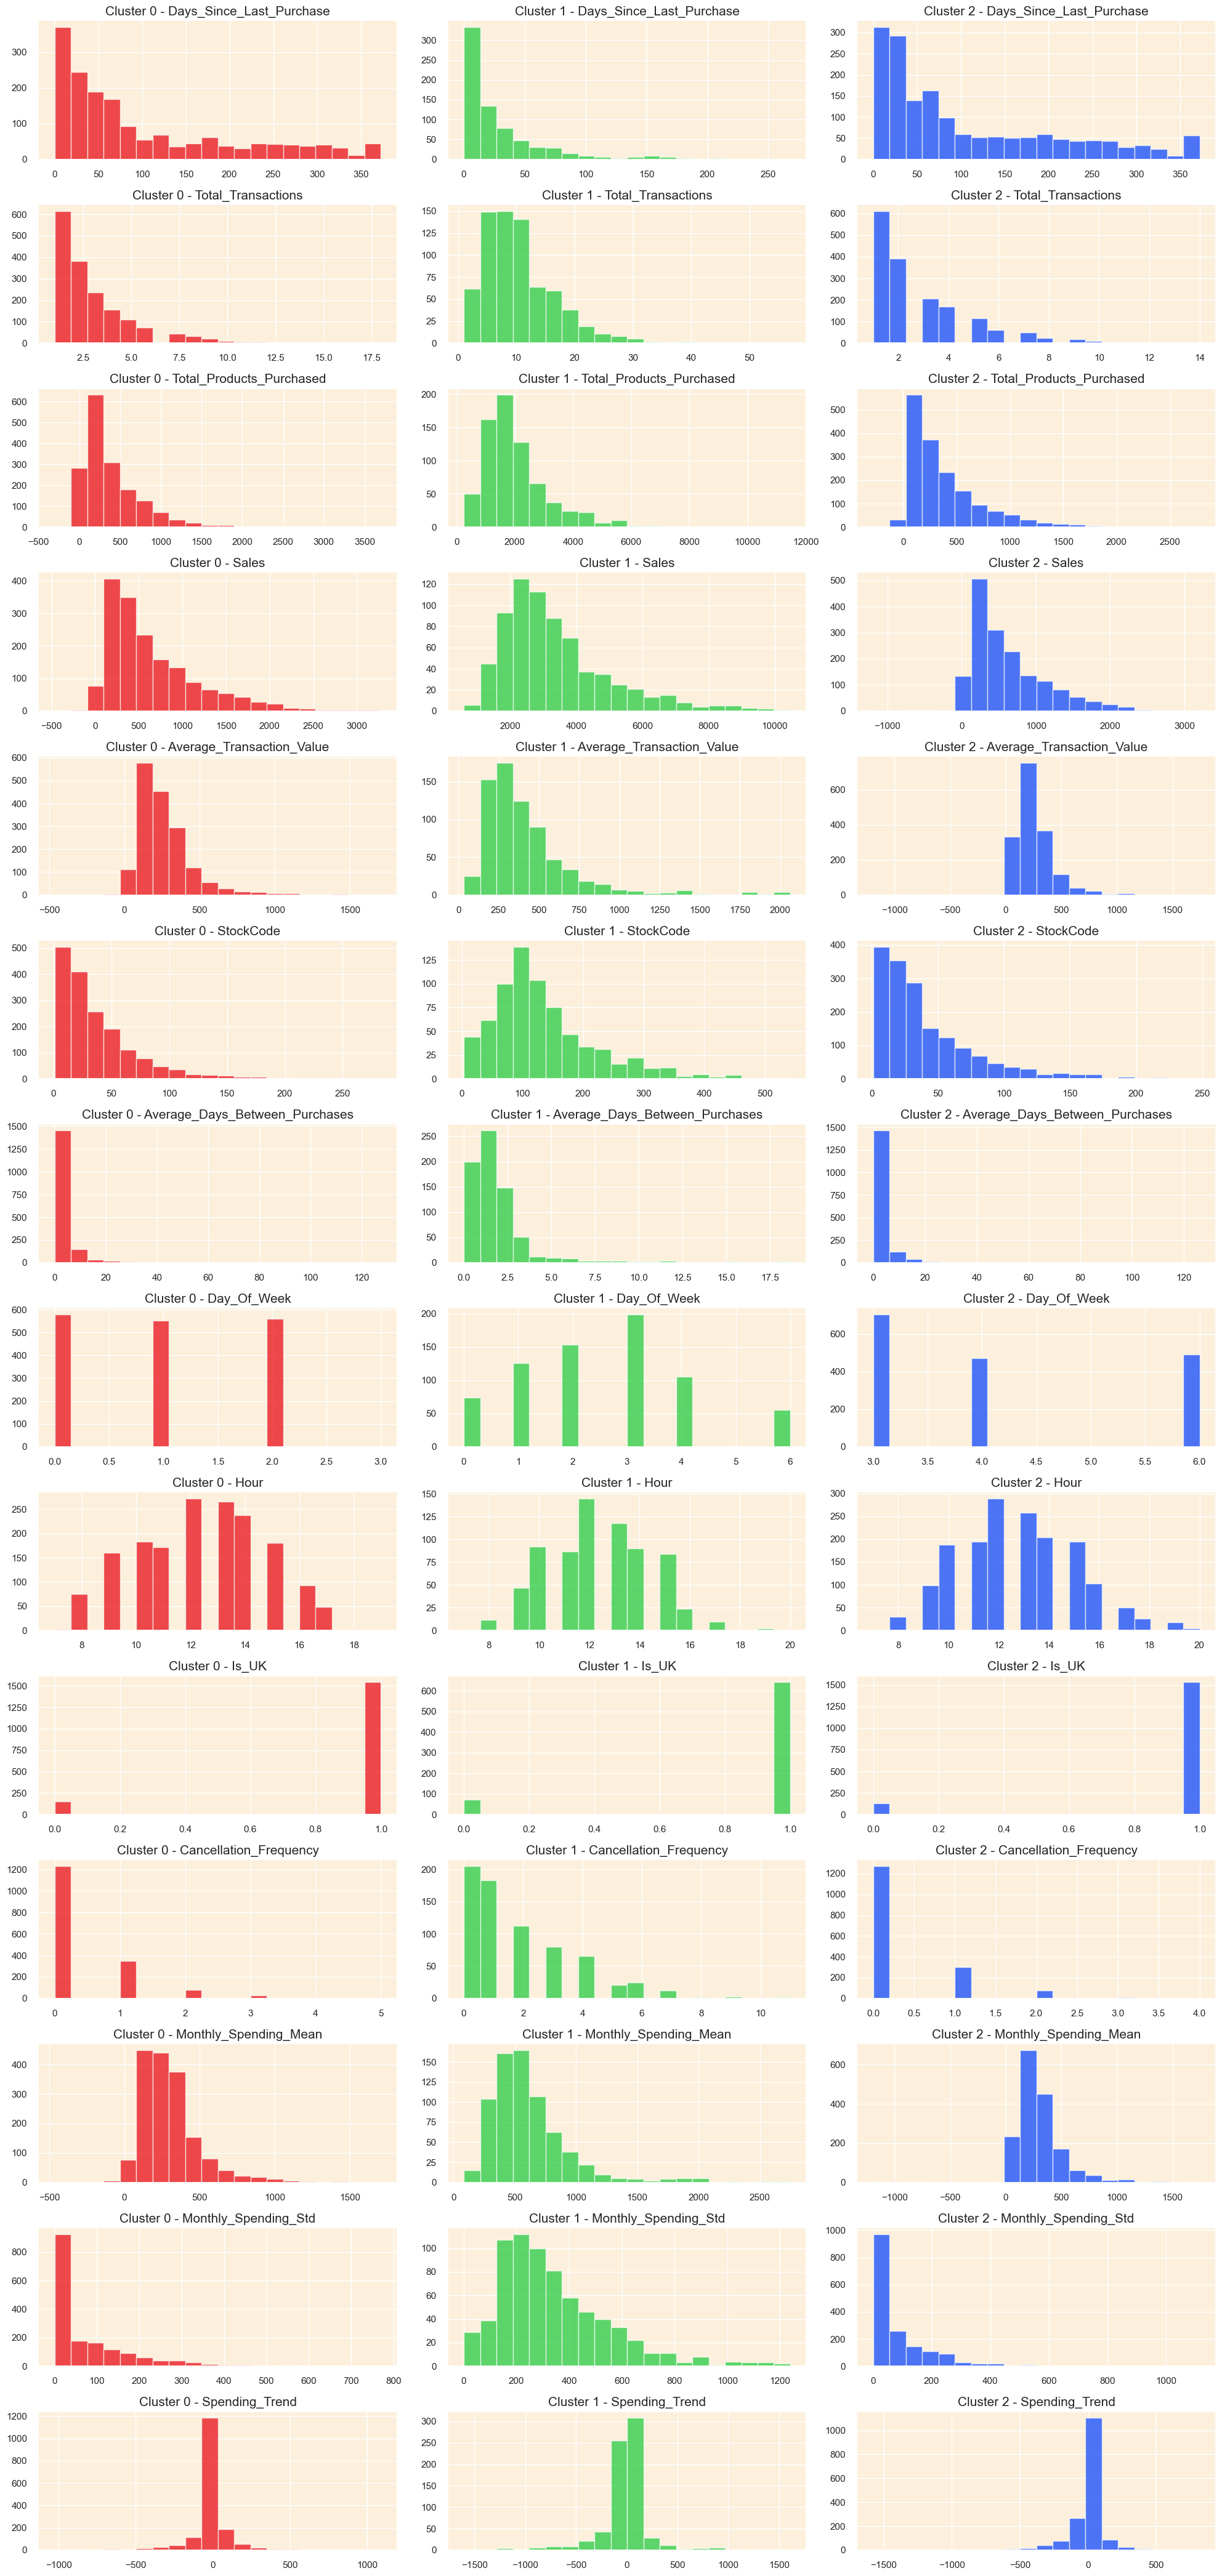

In [70]:

features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

plt.tight_layout()
plt.show()

Cluster 0 (red) = casual weekend shopper

cluster 1 (green) = occasional big spenders

cluster 2 (blue) = eager early bid shopper

In [71]:

outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()
        
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [73]:
customer_data_with_recommendations.set_index('CustomerID').iloc[:,-6:].sample(10,random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
15864.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
15855.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
14789.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
14761.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
12582.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
14381.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
17029.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
17542.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
18127.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,15036,ASSORTED COLOURS SILK FAN,21326,AGED GLASS SILVER T-LIGHT HOLDER
